In [2]:
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
model = YOLO('/Users/bolt/code/driverless-perception/runs/detect/train12/weights/best.pt')

In [4]:
left_image = '/Users/bolt/code/driverless-perception/zed-input-left.png'
right_image = '/Users/bolt/code/driverless-perception/zed-input-right.png'

In [5]:
def template_matching(left_image, right_image, pl_x, pl_y, window_size):
    template = left_image[pl_y - window_size//2:pl_y + window_size//2, pl_x - window_size//2:pl_x + window_size//2]

    min_similarity = float('inf')

    pr_x = 0

    lower_lim = pl_x - 200
    if lower_lim < 0:
        lower_lim = 0
    upper_lim = pl_x + 200
    if upper_lim > right_image.shape[1]:
        upper_lim = right_image.shape[1]

    for x in range(lower_lim, upper_lim):
        window = right_image[pl_y - window_size//2:pl_y + window_size//2, x - window_size//2:x + window_size//2]

        similarity = np.sum((template - window)**2)

        if similarity < min_similarity:
            min_similarity = similarity
            pr_x = x

    pr_y = pl_y

    return pr_x, pr_y


image 1/1 /Users/bolt/code/driverless-perception/zed-input-left.png: 384x640 4 yellow_cones, 5 blue_cones, 85.1ms
Speed: 19.5ms preprocess, 85.1ms inference, 17.8ms postprocess per image at shape (1, 3, 384, 640)


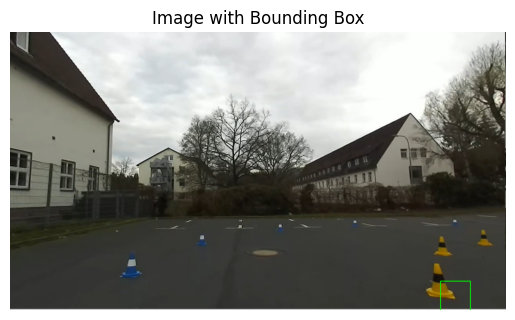

In [29]:
results = model('/Users/bolt/code/driverless-perception/zed-input-left.png')

x,y,w,h = results[0].boxes.xywh[0]

image_path = '/Users/bolt/code/driverless-perception/zed-input-left.png'
image = cv2.imread(image_path)

x = x.item()
y = y.item()
w = w.item()
h = h.item()

x, y, w, h = int(x), int(y), int(w), int(h)

# Draw the bounding box on the image
color = (0, 255, 0)  # Green color (BGR format)
thickness = 2  # Line thickness

# Calculate the coordinates of the opposite corners of the bounding box
start_point = (x, y)
end_point = (x + w, y + h)

# Draw the bounding box rectangle on the image
cv2.rectangle(image, start_point, end_point, color, thickness)

# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with the bounding box using matplotlib
plt.imshow(image_rgb)
plt.title("Image with Bounding Box")
plt.axis("off")
plt.show()

In [32]:


x2, y2 = template_matching(left_image = np.array(cv2.imread(left_image)), right_image = np.array(cv2.imread(right_image)), pl_x = x, pl_y = y, window_size = 40)
disparity = x - x2
focal_length = 1066
pixel_size = 0.002
baseline = 120
depth = 2.1 * (baseline/disparity)
print(depth)

6.146341463414634


In [130]:
x, y, x2, y2

(1168, 648, 1358, 648)

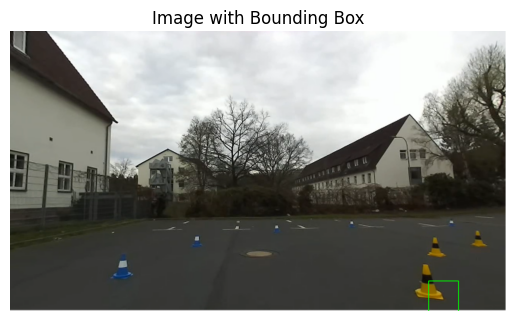

In [26]:
image_path = '/Users/bolt/code/driverless-perception/zed-input-right.png'
image = cv2.imread(image_path)

# Calculate the coordinates of the opposite corners of the bounding box
start_point = (x2, y)
end_point = (x2 + w, y + h)

# Draw the bounding box rectangle on the image
cv2.rectangle(image, start_point, end_point, color, thickness)

# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with the bounding box using matplotlib
plt.imshow(image_rgb)
plt.title("Image with Bounding Box")
plt.axis("off")
plt.show()

In [122]:
w

36

(648, 704, 28, 704)

In [79]:
disparity

15

In [90]:
x2, y2 = template_matching(left_image = np.array(cv2.imread(left_image)), right_image = np.array(cv2.imread(right_image)), pl_x = x, pl_y = y, window_size = 20)
disparity = x - x2
focal_length = 1066
pixel_size = 0.002
baseline = 120
depth = (focal_length/pixel_size) * (baseline/disparity)
depth/1000

1305.3061224489797

In [44]:
depth = (focal_length/pixel_size) * (baseline/disparity)

2.926829268292683